In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
sns.set_style("darkgrid")
import missingno as msno
from sklearn import metrics
from IPython.display import display
import warnings
warnings.filterwarnings(action="ignore")

In [2]:
# dataset
df = pd.read_csv("../input/divorce.csv")
# data exploration 
df.head()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [3]:
df.describe()

,Sorry_end,Ignore_diff,begin_correct,Contact,Special_time,No_home_time,2_strangers,enjoy_holiday,enjoy_travel,common_goals,...,silence_for_harm,silence_fear_anger,I'm_right,accusations,I'm_not_guilty,I'm_not_wrong,no_hesitancy_inadequate,you're_inadequate,incompetence,Divorce_Y_N
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,...,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,...,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,...,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,...,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000


In [4]:
df.info()
df.shape
# all the columns contain integer data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
Sorry_end                        170 non-null int64
Ignore_diff                      170 non-null int64
begin_correct                    170 non-null int64
Contact                          170 non-null int64
Special_time                     170 non-null int64
No_home_time                     170 non-null int64
2_strangers                      170 non-null int64
enjoy_holiday                    170 non-null int64
enjoy_travel                     170 non-null int64
common_goals                     170 non-null int64
harmony                          170 non-null int64
freeom_value                     170 non-null int64
entertain                        170 non-null int64
people_goals                     170 non-null int64
dreams                           170 non-null int64
love                             170 non-null int64
happy                            170 non-null int64
marriage   

(170, 55)

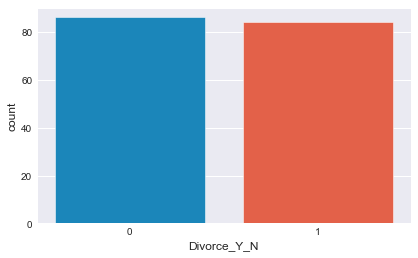

In [5]:
# the count of divorced vs still married
sns.countplot(df.Divorce_Y_N)
plt.show()

In [6]:
# preprocessing data to see if they are any missing values
df.isnull().sum()

Sorry_end                        0
Ignore_diff                      0
begin_correct                    0
Contact                          0
Special_time                     0
No_home_time                     0
2_strangers                      0
enjoy_holiday                    0
enjoy_travel                     0
common_goals                     0
harmony                          0
freeom_value                     0
entertain                        0
people_goals                     0
dreams                           0
love                             0
happy                            0
marriage                         0
roles                            0
trust                            0
likes                            0
care_sick                        0
fav_food                         0
stresses                         0
inner_world                      0
anxieties                        0
current_stress                   0
hopes_wishes                     0
know_well           

In [7]:
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [8]:
# base estimators which will be stacked together
estimators = [
     ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))
]

In [9]:
# Predicting Divorce using Stacking Classifier
sc = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression() # the final_estimator is a classifier which will be used to combine the base estimators
)

In [10]:
# the labels : select the X and y values 
X = df.drop('Divorce_Y_N',axis=1)
y = df['Divorce_Y_N']

In [11]:
# splitting data arrays into two subsets: for training data and for testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.3, random_state=42)

In [12]:
# takes the training data as arguments on the Stacking Classifier
sc.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [13]:
# predict the labels of the data values
sc_pred = sc.predict(X_test)

Classification report
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.92      0.96        25

    accuracy                           0.96        51
   macro avg       0.96      0.96      0.96        51
weighted avg       0.96      0.96      0.96        51

Accuracy: 96.07843137254902 %


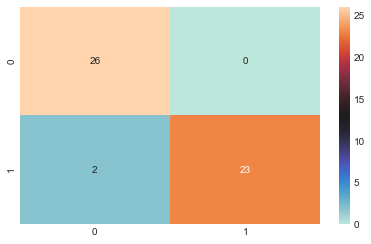

In [14]:
# first, build a text report showing the main classification metrics
print("Classification report")
print(classification_report(y_test,sc_pred))
# then, print the accuracy classification score
acc = accuracy_score(y_test, sc_pred)
print(f"Accuracy: {acc*100} %")
# compute confusion matrix to evaluate the accuracy of a classification
cm = confusion_matrix(y_test,sc_pred)
# finally, plot the confusion matrix
sns.heatmap(cm, annot=True,cmap="icefire")
plt.show()